In [1]:
import pandas as pd
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\vivek\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
df1 = pd.read_csv("C:\\Users\\vivek\\OneDrive\\Desktop\\FLIGHTMODELS\\Clean_Dataset.csv")

In [4]:
df1

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
df1.shape


(300153, 12)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
df1.duplicated().sum()

0

In [8]:
df1.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
df2=df1.drop(columns=['Unnamed: 0'],inplace=False)

In [10]:
df2

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [11]:
import seaborn as sns 

In [12]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\vivek\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [13]:
import seaborn as sns

In [14]:
df1

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [15]:
df2

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


C:\Users\vivek\AppData\Local\Temp\ipykernel_66212\2885749994.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['price'])


<Axes: xlabel='price', ylabel='Density'>

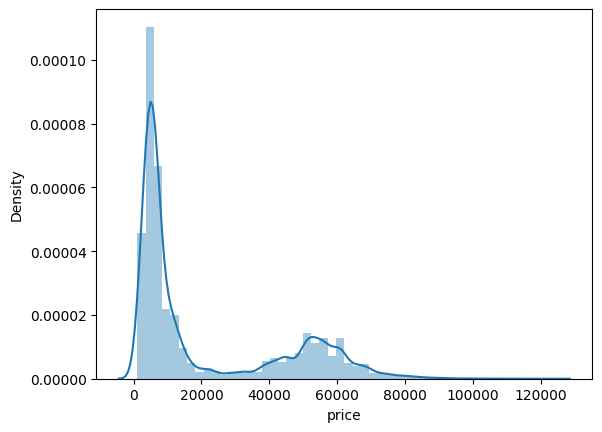

In [16]:
sns.distplot(df2['price'])

C:\Users\vivek\AppData\Local\Temp\ipykernel_66212\1075735031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='airline', y='number_of_flights', data=flight_counts, palette='magma')


<Axes: xlabel='airline', ylabel='number_of_flights'>

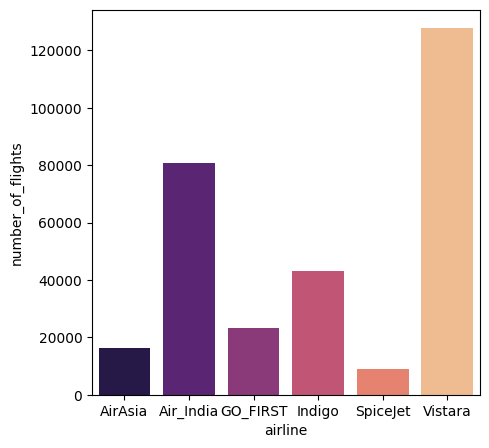

In [17]:
flight_counts = df2.groupby('airline').size().reset_index(name='number_of_flights')
plt.figure(figsize=(5,5))
sns.barplot(x='airline', y='number_of_flights', data=flight_counts, palette='magma')

C:\Users\vivek\AppData\Local\Temp\ipykernel_66212\2317065864.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df2['airline'],y=df2['price'],palette='magma')


<Axes: xlabel='airline', ylabel='price'>

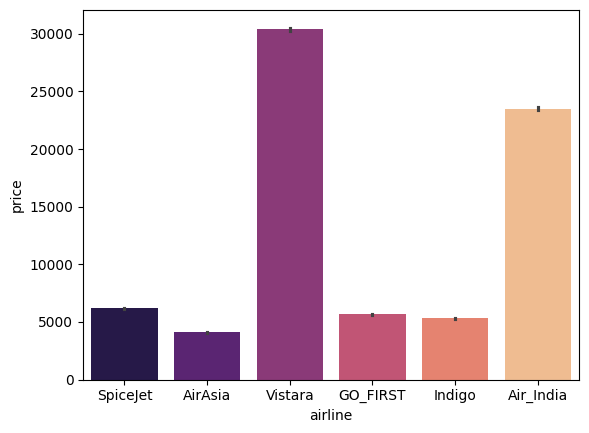

In [18]:
sns.barplot(x=df2['airline'],y=df2['price'],palette='magma')


C:\Users\vivek\AppData\Local\Temp\ipykernel_66212\1066621069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df2['departure_time'],y=df2['price'],palette='magma')


<Axes: xlabel='departure_time', ylabel='price'>

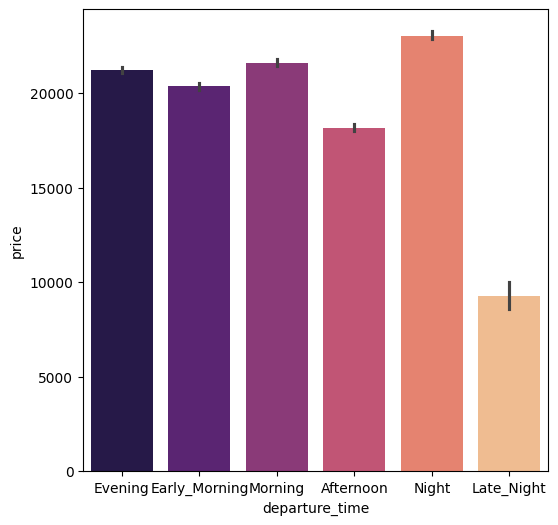

In [19]:
departure_counts = df2.groupby('departure_time').size().reset_index(name='departure_time_flights')
plt.figure(figsize=(6,6))
sns.barplot(x=df2['departure_time'],y=df2['price'],palette='magma')



<Axes: xlabel='airline', ylabel='duration'>

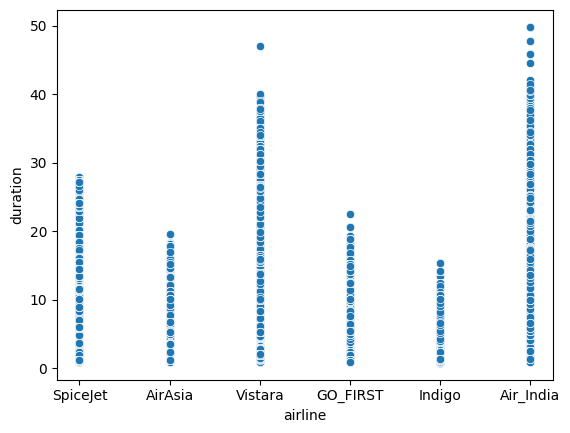

In [20]:
sns.scatterplot(x=df2['airline'],y=df2['duration'])

<Axes: xlabel='stops', ylabel='price'>

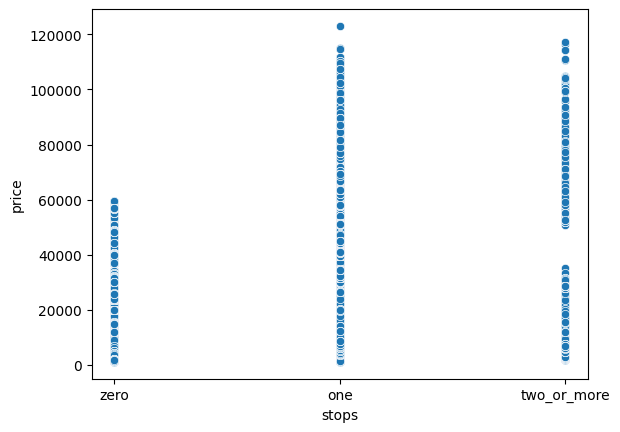

In [21]:
sns.scatterplot(x=df2['stops'],y=df2['price'])

In [22]:
Airline=df2["airline"]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,False,False
3,False,False,False,False,True
4,False,False,False,False,True


In [23]:
df2["airline"].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

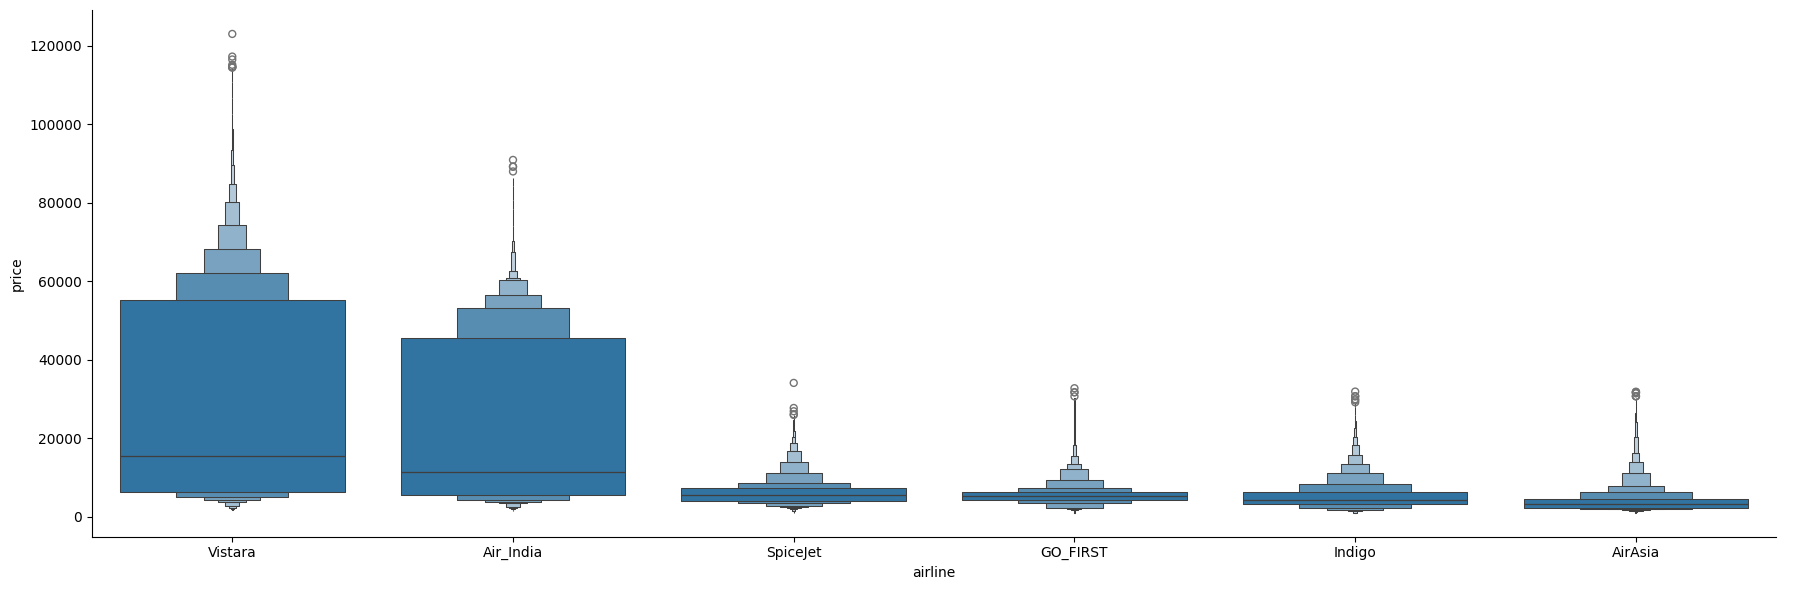

In [24]:
sns.catplot(y="price",x="airline",data=df2.sort_values("price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()


In [25]:
df2["source_city"].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

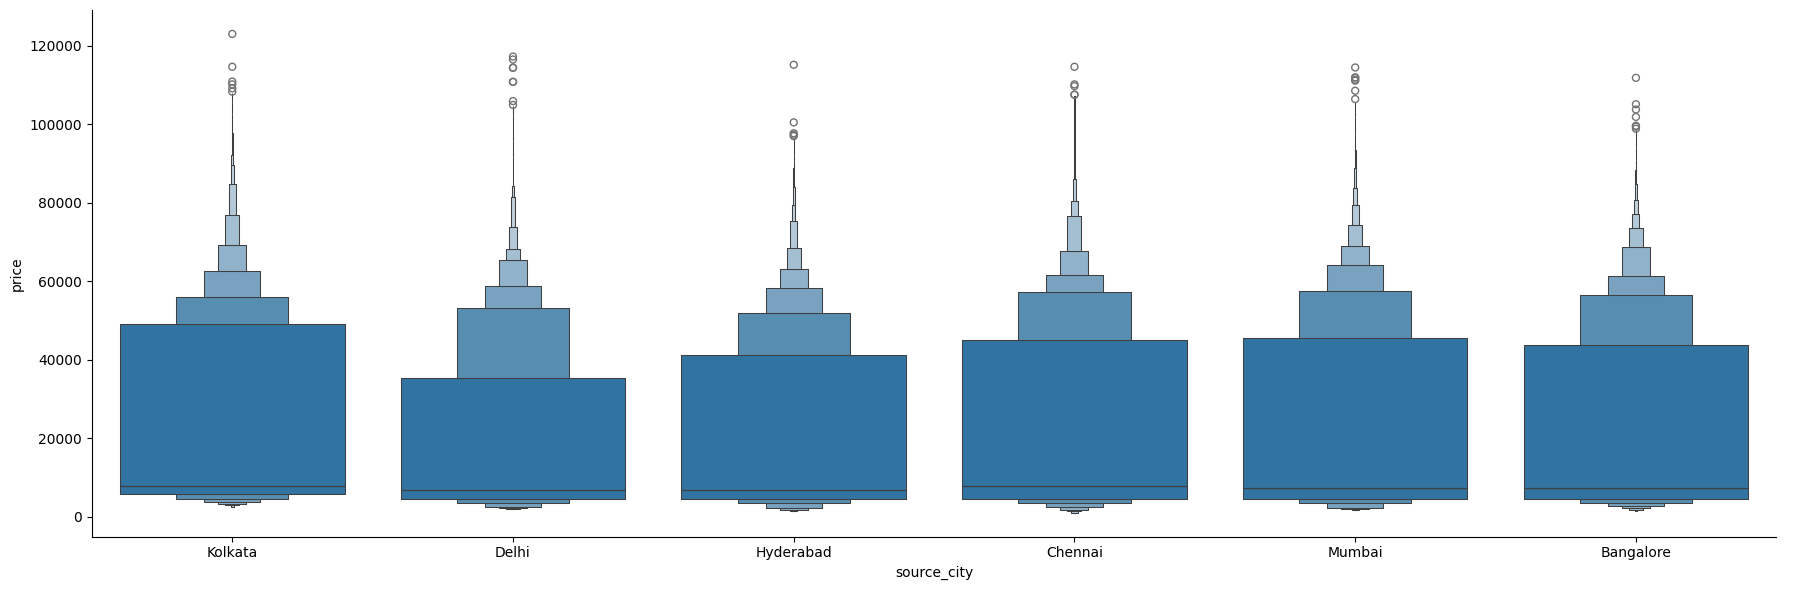

In [26]:
sns.catplot(x="source_city",y="price",data=df2.sort_values("price",ascending=False),kind="boxen",height=6,aspect=3)

In [27]:
Source=df2["source_city"]
Source=pd.get_dummies(Source)
Source.head()

,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,False,False,True,False,False,False
1,False,False,True,False,False,False
2,False,False,True,False,False,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False


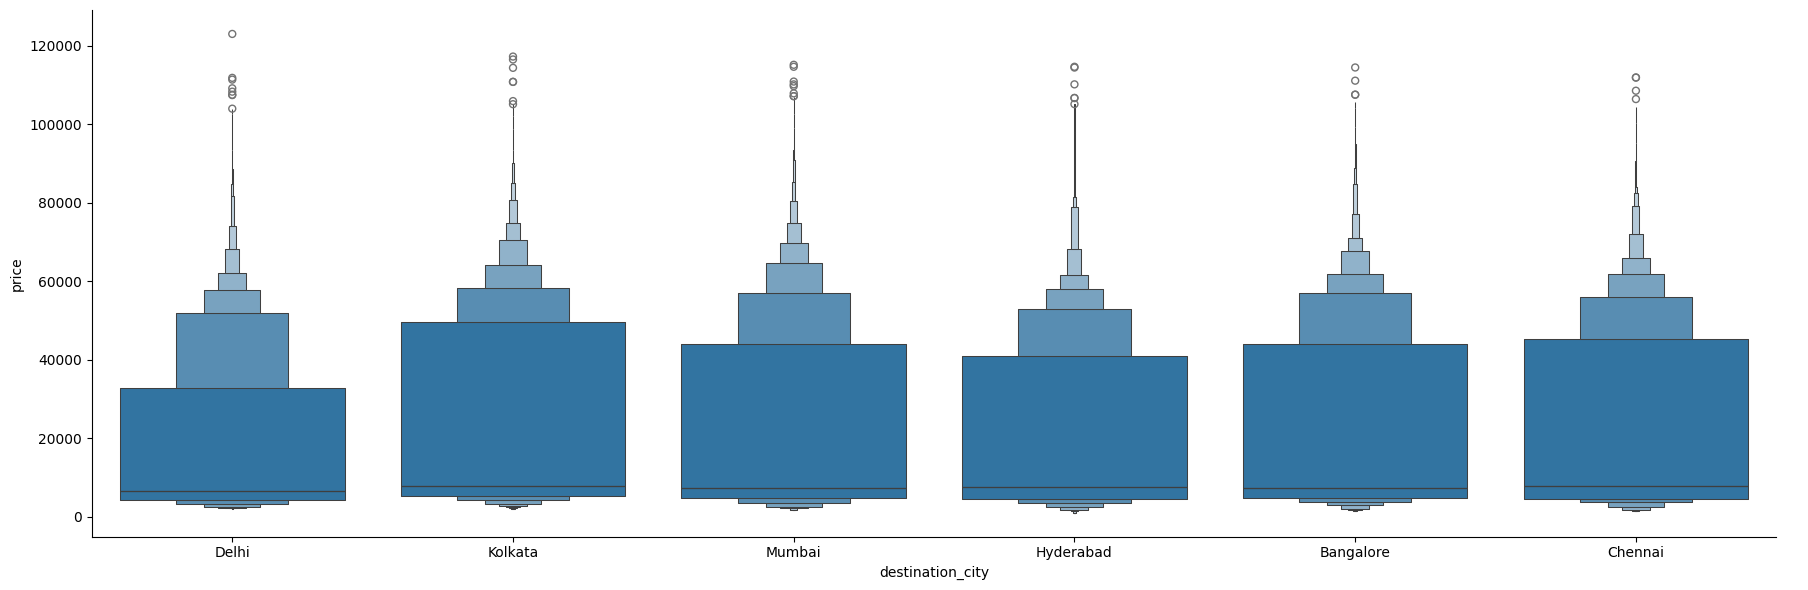

In [28]:
sns.catplot(x="destination_city",y="price",data=df2.sort_values("price",ascending=False),kind="boxen",height=6,aspect=3)

In [29]:
Dest=df2["destination_city"]
Dest=pd.get_dummies(Dest)
Dest.head()

,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,False,False,True
4,False,False,False,False,False,True


In [30]:
df2.replace({"zero":0,"one":1})

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10.00,49,81585


In [31]:
Dept=df2["departure_time"]
Dept=pd.get_dummies(Dept)
Dept.head()

,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
0,False,False,True,False,False,False
1,False,True,False,False,False,False
2,False,True,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False


In [32]:
Arrv=df2["arrival_time"]
Arrv=pd.get_dummies(Arrv)
Arrv.head()

,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
0,False,False,False,False,False,True
1,False,False,False,False,True,False
2,False,True,False,False,False,False
3,True,False,False,False,False,False
4,False,False,False,False,True,False


In [33]:
df2.drop(["airline","source_city","destination_city","arrival_time","departure_time","flight"],axis=1,inplace=True)

In [34]:
df2

,stops,class,duration,days_left,price
0,zero,Economy,2.17,1,5953
1,zero,Economy,2.33,1,5953
2,zero,Economy,2.17,1,5956
3,zero,Economy,2.25,1,5955
4,zero,Economy,2.33,1,5955
...,...,...,...,...,...
300148,one,Business,10.08,49,69265
300149,one,Business,10.42,49,77105
300150,one,Business,13.83,49,79099
300151,one,Business,10.00,49,81585


In [35]:
df2.shape

(300153, 5)

In [36]:
testdf=pd.read_csv("C:\\Users\\vivek\\OneDrive\\Desktop\\FLIGHTMODELS\\Clean_Dataset.csv")

In [37]:
testdf.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [38]:
data_train = pd.concat([df2, Airline, Source, Dest,Arrv,Dept], axis = 1)

In [39]:
data_train.head()

,stops,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,...,Evening,Late_Night,Morning,Night,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
0,zero,Economy,2.17,1,5953,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
1,zero,Economy,2.33,1,5953,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
2,zero,Economy,2.17,1,5956,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,zero,Economy,2.25,1,5955,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,zero,Economy,2.33,1,5955,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [40]:
Class=df2["class"]
Class=pd.get_dummies(Class)
Class.head()

,Business,Economy
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [41]:
data_train = pd.concat([df2, Airline, Source, Dest,Arrv,Dept,Class], axis = 1)

In [42]:
data_train = data_train.drop(columns=['class'], inplace=False)
data_train.replace({"zero":0,"one":1})

,stops,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Bangalore,...,Morning,Night,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night,Business,Economy
0,0,2.17,1,5953,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
1,0,2.33,1,5953,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,True
2,0,2.17,1,5956,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,0,2.25,1,5955,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
4,0,2.33,1,5955,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,10.08,49,69265,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
300149,1,10.42,49,77105,False,False,False,False,True,False,...,False,True,True,False,False,False,False,False,True,False
300150,1,13.83,49,79099,False,False,False,False,True,False,...,False,True,False,True,False,False,False,False,True,False
300151,1,10.00,49,81585,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [43]:
data_train.head()

,stops,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Bangalore,...,Morning,Night,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night,Business,Economy
0,zero,2.17,1,5953,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
1,zero,2.33,1,5953,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,True
2,zero,2.17,1,5956,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,zero,2.25,1,5955,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
4,zero,2.33,1,5955,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,True


In [44]:
data_train.shape

(300153, 35)

In [45]:
## TESTING 

In [46]:
test_data = pd.read_csv("C:\\Users\\vivek\\OneDrive\\Desktop\\FLIGHTMODELS\\Clean_Dataset.csv")

In [47]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# Categorical data

print("airline")
print("-"*75)
print(test_data["airline"].value_counts())
Airline = pd.get_dummies(test_data["airline"])

print()

print("source_city")
print("-"*75)
print(test_data["source_city"].value_counts())
Source = pd.get_dummies(test_data["source_city"])

print()

print("destination_city")
print("-"*75)
print(test_data["destination_city"].value_counts())
Dest = pd.get_dummies(test_data["destination_city"])


print()

print("departure_time")
print("-"*75)
print(test_data["departure_time"].value_counts())
Dept = pd.get_dummies(test_data["departure_time"])

print()

print("class")
print("-"*75)
print(test_data["class"].value_counts())
Class = pd.get_dummies(test_data["class"])



# Replacing Total_Stops
test_data.replace({"zero": 0, "one": 1}, inplace = True)


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None


Null values :
------------------------------------------

In [48]:
data_train.head()

,stops,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Bangalore,...,Morning,Night,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night,Business,Economy
0,zero,2.17,1,5953,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
1,zero,2.33,1,5953,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,True
2,zero,2.17,1,5956,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,zero,2.25,1,5955,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
4,zero,2.33,1,5955,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,True


In [49]:
data_train.shape


(300153, 35)

In [50]:
data_train = pd.concat([df2, Airline, Source, Dest,Arrv,Dept,Class], axis = 1)

In [51]:
data_train.head()

,stops,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,...,Morning,Night,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night,Business,Economy
0,zero,Economy,2.17,1,5953,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
1,zero,Economy,2.33,1,5953,False,False,False,False,True,...,True,False,False,True,False,False,False,False,False,True
2,zero,Economy,2.17,1,5956,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,zero,Economy,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,zero,Economy,2.33,1,5955,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


In [52]:
# Ensure to replace all non-numeric values with numeric equivalents and modify the DataFrame in place
data_train['stops'].replace({"zero": 0, "one": 1, "two_or_more": 2}, inplace=True)

# Convert 'stops' column to float
data_train['stops'] = data_train['stops'].astype(float)

# Display the DataFrame to confirm the conversion
print(data_train.head())

   stops    class  duration  days_left  price  AirAsia  Air_India  GO_FIRST  \
0    0.0  Economy      2.17          1   5953    False      False     False   
1    0.0  Economy      2.33          1   5953    False      False     False   
2    0.0  Economy      2.17          1   5956     True      False     False   
3    0.0  Economy      2.25          1   5955    False      False     False   
4    0.0  Economy      2.33          1   5955    False      False     False   

   Indigo  SpiceJet  ...  Morning  Night  Afternoon  Early_Morning  Evening  \
0   False      True  ...    False   True      False          False     True   
1   False      True  ...     True  False      False           True    False   
2   False     False  ...    False  False      False           True    False   
3   False     False  ...    False  False      False          False    False   
4   False     False  ...     True  False      False          False    False   

   Late_Night  Morning  Night  Business  Economy  

C:\Users\vivek\AppData\Local\Temp\ipykernel_66212\2094316485.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['stops'].replace({"zero": 0, "one": 1, "two_or_more": 2}, inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_66212\2094316485.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', 

In [53]:
data_train.head()

,stops,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,...,Morning,Night,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night,Business,Economy
0,0.0,Economy,2.17,1,5953,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
1,0.0,Economy,2.33,1,5953,False,False,False,False,True,...,True,False,False,True,False,False,False,False,False,True
2,0.0,Economy,2.17,1,5956,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,0.0,Economy,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,0.0,Economy,2.33,1,5955,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


In [54]:
data_train.columns


Index(['stops', 'class', 'duration', 'days_left', 'price', 'AirAsia',
       'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet', 'Vistara', 'Bangalore',
       'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Bangalore',
       'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Afternoon',
       'Early_Morning', 'Evening', 'Late_Night', 'Morning', 'Night',
       'Afternoon', 'Early_Morning', 'Evening', 'Late_Night', 'Morning',
       'Night', 'Business', 'Economy'],
      dtype='object')

In [55]:
X = data_train.loc[:,['stops', 'class', 'duration', 'days_left', 'price', 'AirAsia',
       'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet', 'Vistara', 'Bangalore',
       'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Bangalore',
       'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Afternoon',
       'Early_Morning', 'Evening', 'Late_Night', 'Morning', 'Night',
       'Afternoon', 'Early_Morning', 'Evening', 'Late_Night', 'Morning',
       'Night', 'Business', 'Economy']]
X.head()

,stops,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,...,Evening,Evening,Late_Night,Late_Night,Morning,Morning,Night,Night,Business,Economy
0,0.0,Economy,2.17,1,5953,False,False,False,False,True,...,False,True,False,False,False,False,True,False,False,True
1,0.0,Economy,2.33,1,5953,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,0.0,Economy,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.0,Economy,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,0.0,Economy,2.33,1,5955,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,True


In [56]:
data_train.head()

,stops,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,...,Morning,Night,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night,Business,Economy
0,0.0,Economy,2.17,1,5953,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
1,0.0,Economy,2.33,1,5953,False,False,False,False,True,...,True,False,False,True,False,False,False,False,False,True
2,0.0,Economy,2.17,1,5956,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,0.0,Economy,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,0.0,Economy,2.33,1,5955,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


In [57]:
a = data_train.iloc[:,0:34]
print(a)

        stops     class  duration  days_left  price  AirAsia  Air_India  \
0         0.0   Economy      2.17          1   5953    False      False   
1         0.0   Economy      2.33          1   5953    False      False   
2         0.0   Economy      2.17          1   5956     True      False   
3         0.0   Economy      2.25          1   5955    False      False   
4         0.0   Economy      2.33          1   5955    False      False   
...       ...       ...       ...        ...    ...      ...        ...   
300148    1.0  Business     10.08         49  69265    False      False   
300149    1.0  Business     10.42         49  77105    False      False   
300150    1.0  Business     13.83         49  79099    False      False   
300151    1.0  Business     10.00         49  81585    False      False   
300152    1.0  Business     10.08         49  81585    False      False   

        GO_FIRST  Indigo  SpiceJet  ...  Early_Morning  Evening  Late_Night  \
0          False   F

In [58]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 37 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   stops          300153 non-null  float64
 1   class          300153 non-null  object 
 2   duration       300153 non-null  float64
 3   days_left      300153 non-null  int64  
 4   price          300153 non-null  int64  
 5   AirAsia        300153 non-null  bool   
 6   Air_India      300153 non-null  bool   
 7   GO_FIRST       300153 non-null  bool   
 8   Indigo         300153 non-null  bool   
 9   SpiceJet       300153 non-null  bool   
 10  Vistara        300153 non-null  bool   
 11  Bangalore      300153 non-null  bool   
 12  Chennai        300153 non-null  bool   
 13  Delhi          300153 non-null  bool   
 14  Hyderabad      300153 non-null  bool   
 15  Kolkata        300153 non-null  bool   
 16  Mumbai         300153 non-null  bool   
 17  Bangalore      300153 non-nul

In [59]:
stops_column = data_train.stops

In [60]:
stops_column.info()

<class 'pandas.core.series.Series'>
RangeIndex: 300153 entries, 0 to 300152
Series name: stops
Non-Null Count   Dtype  
--------------   -----  
300153 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [61]:
# Ensure to replace all non-numeric values with numeric equivalents and modify the DataFrame in place
data_train['stops'].replace({"zero": 0, "one": 1, "two_or_more": 2}, inplace=True)

# Convert 'stops' column to float
data_train['stops'] = data_train['stops'].astype(float)

# Display the DataFrame to confirm the conversion
print(data_train.head())

   stops    class  duration  days_left  price  AirAsia  Air_India  GO_FIRST  \
0    0.0  Economy      2.17          1   5953    False      False     False   
1    0.0  Economy      2.33          1   5953    False      False     False   
2    0.0  Economy      2.17          1   5956     True      False     False   
3    0.0  Economy      2.25          1   5955    False      False     False   
4    0.0  Economy      2.33          1   5955    False      False     False   

   Indigo  SpiceJet  ...  Morning  Night  Afternoon  Early_Morning  Evening  \
0   False      True  ...    False   True      False          False     True   
1   False      True  ...     True  False      False           True    False   
2   False     False  ...    False  False      False           True    False   
3   False     False  ...    False  False      False          False    False   
4   False     False  ...     True  False      False          False    False   

   Late_Night  Morning  Night  Business  Economy  

In [62]:
data_train.head()

,stops,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,...,Morning,Night,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night,Business,Economy
0,0.0,Economy,2.17,1,5953,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
1,0.0,Economy,2.33,1,5953,False,False,False,False,True,...,True,False,False,True,False,False,False,False,False,True
2,0.0,Economy,2.17,1,5956,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,0.0,Economy,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,0.0,Economy,2.33,1,5955,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


In [63]:
data_train = data_train.drop(columns=['class'])

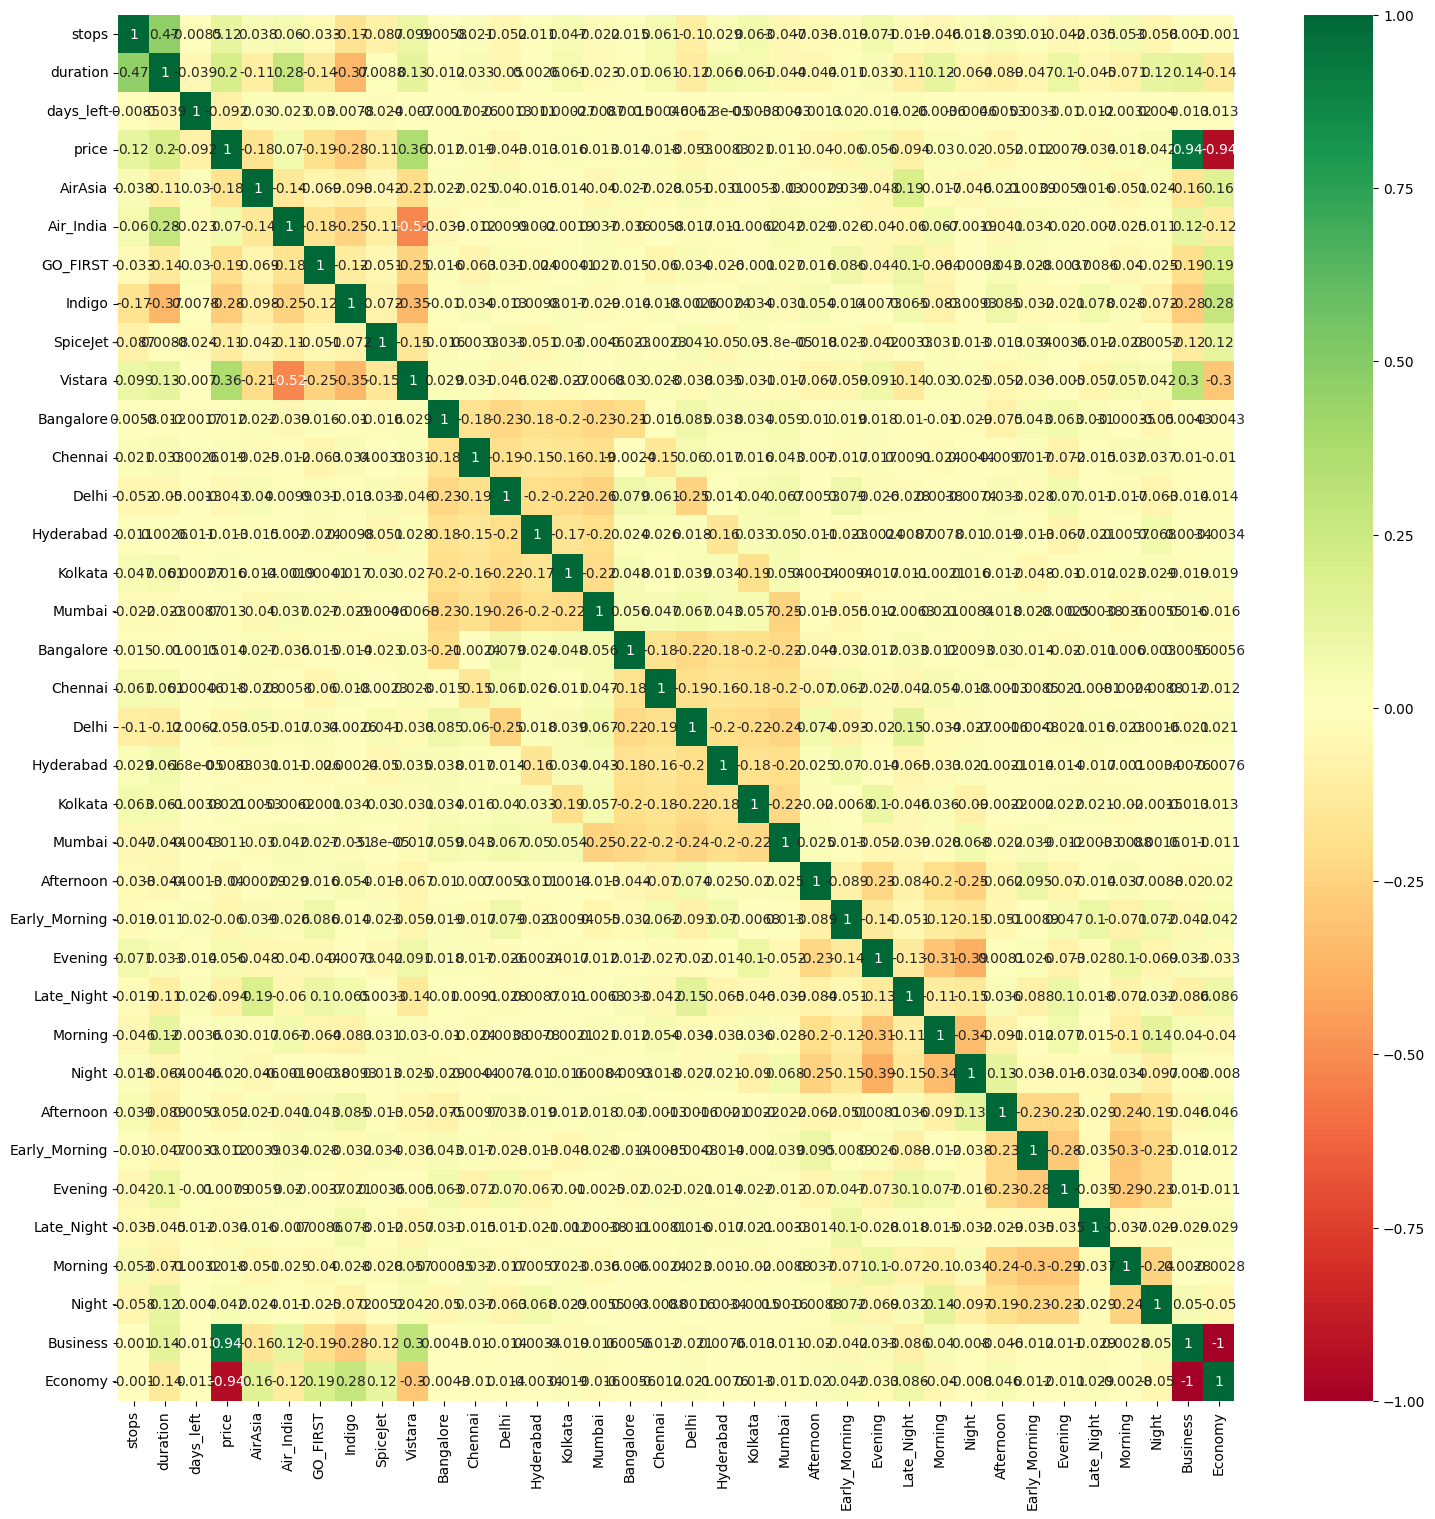

In [64]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [65]:
X=X.drop(columns=['class'])
print(X)

        stops  duration  days_left  price  AirAsia  Air_India  GO_FIRST  \
0         0.0      2.17          1   5953    False      False     False   
1         0.0      2.33          1   5953    False      False     False   
2         0.0      2.17          1   5956     True      False     False   
3         0.0      2.25          1   5955    False      False     False   
4         0.0      2.33          1   5955    False      False     False   
...       ...       ...        ...    ...      ...        ...       ...   
300148    1.0     10.08         49  69265    False      False     False   
300149    1.0     10.42         49  77105    False      False     False   
300150    1.0     13.83         49  79099    False      False     False   
300151    1.0     10.00         49  81585    False      False     False   
300152    1.0     10.08         49  81585    False      False     False   

        Indigo  SpiceJet  Vistara  ...  Evening  Evening  Late_Night  \
0        False      True   

In [66]:
a=a.drop(columns=['class'])
print(a)

        stops  duration  days_left  price  AirAsia  Air_India  GO_FIRST  \
0         0.0      2.17          1   5953    False      False     False   
1         0.0      2.33          1   5953    False      False     False   
2         0.0      2.17          1   5956     True      False     False   
3         0.0      2.25          1   5955    False      False     False   
4         0.0      2.33          1   5955    False      False     False   
...       ...       ...        ...    ...      ...        ...       ...   
300148    1.0     10.08         49  69265    False      False     False   
300149    1.0     10.42         49  77105    False      False     False   
300150    1.0     13.83         49  79099    False      False     False   
300151    1.0     10.00         49  81585    False      False     False   
300152    1.0     10.08         49  81585    False      False     False   

        Indigo  SpiceJet  Vistara  ...  Early_Morning  Evening  Late_Night  \
0        False      T

In [67]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor(n_estimators=10,max_depth=10)
selection.fit(X, a)

ExtraTreesRegressor(max_depth=10, n_estimators=10)

In [68]:
print(selection.feature_importances_)

[1.47897751e-02 6.46571728e-03 5.10532754e-03 1.76597084e-01
 6.35476483e-05 3.75437848e-04 9.23973155e-07 1.57112961e-05
 9.34187984e-10 2.83570200e-03 4.68278611e-05 5.06541904e-05
 3.44164204e-06 2.38813428e-06 4.37705352e-05 1.31737690e-05
 1.30119908e-06 1.48914037e-06 7.85949970e-05 4.21354735e-06
 9.86163855e-06 4.24700515e-06 1.28471446e-05 1.42326559e-06
 9.88107140e-06 8.70824916e-06 3.01837083e-06 1.47794801e-04
 7.19150250e-06 2.86364239e-05 2.26108343e-04 1.99706829e-04
 3.72518825e-05 7.88025782e-06 1.33550275e-06 2.60147551e-07
 6.83965140e-09 8.68667724e-08 7.34892297e-07 1.47490469e-07
 1.12413642e-10 4.39487815e-13 4.92220229e-08 5.07891876e-08
 2.98076222e-08 4.78947109e-07 6.45331549e-08 4.09609894e-09
 1.53961758e-07 9.83686979e-08 1.93799163e-08 2.90512718e-06
 5.72207044e-08 0.00000000e+00 2.32515054e-07 9.24102162e-07
 1.27090307e-07 6.44624741e-06 4.40486406e-01 3.52299741e-01]


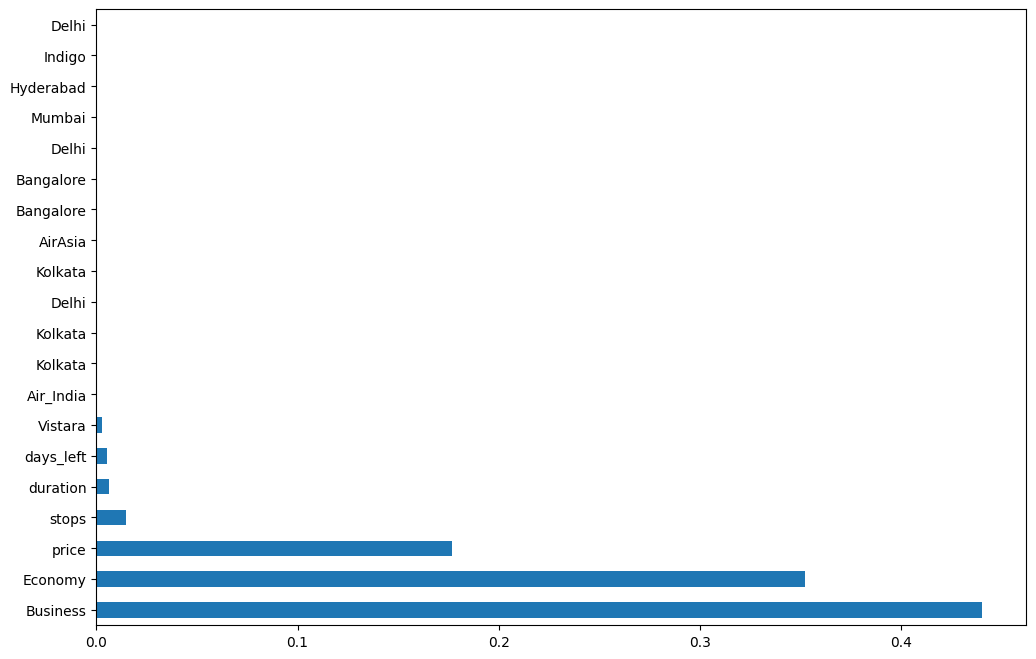

In [69]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [70]:
data_train.head()

,stops,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,...,Morning,Night,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night,Business,Economy
0,0.0,2.17,1,5953,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
1,0.0,2.33,1,5953,False,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,True
2,0.0,2.17,1,5956,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,0.0,2.25,1,5955,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,0.0,2.33,1,5955,False,False,False,False,False,True,...,True,False,False,False,False,False,True,False,False,True


In [71]:
test_data=data_train

In [72]:
test_data.head()

,stops,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,...,Morning,Night,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night,Business,Economy
0,0.0,2.17,1,5953,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
1,0.0,2.33,1,5953,False,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,True
2,0.0,2.17,1,5956,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,0.0,2.25,1,5955,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,0.0,2.33,1,5955,False,False,False,False,False,True,...,True,False,False,False,False,False,True,False,False,True


In [73]:
X=data_train

In [74]:
print(X)

        stops  duration  days_left  price  AirAsia  Air_India  GO_FIRST  \
0         0.0      2.17          1   5953    False      False     False   
1         0.0      2.33          1   5953    False      False     False   
2         0.0      2.17          1   5956     True      False     False   
3         0.0      2.25          1   5955    False      False     False   
4         0.0      2.33          1   5955    False      False     False   
...       ...       ...        ...    ...      ...        ...       ...   
300148    1.0     10.08         49  69265    False      False     False   
300149    1.0     10.42         49  77105    False      False     False   
300150    1.0     13.83         49  79099    False      False     False   
300151    1.0     10.00         49  81585    False      False     False   
300152    1.0     10.08         49  81585    False      False     False   

        Indigo  SpiceJet  Vistara  ...  Morning  Night  Afternoon  \
0        False      True    Fa

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define your features (X) and target (a)
# Assuming 'price' is your target variable
X= data_train.drop('price', axis=1)  # Drop the target column from features
a = data_train['price']               # Target column

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, a_train, a_test = train_test_split(X, a, test_size=0.2, random_state=42)

# Check the shapes to confirm the split
print(f"Training data shape: {X_train.shape}")  # Should be (240000, 34) if original data has 300000 rows
print(f"Test data shape: {X_test.shape}")       # Should be (60000, 34)

print(f"Training target shape: {a_train.shape}")  # Should be (240000,)
print(f"Test target shape: {a_test.shape}")       # Should be (60000,)

Training data shape: (240122, 35)
Test data shape: (60031, 35)
Training target shape: (240122,)
Test target shape: (60031,)


In [76]:
print(X)

        stops  duration  days_left  AirAsia  Air_India  GO_FIRST  Indigo  \
0         0.0      2.17          1    False      False     False   False   
1         0.0      2.33          1    False      False     False   False   
2         0.0      2.17          1     True      False     False   False   
3         0.0      2.25          1    False      False     False   False   
4         0.0      2.33          1    False      False     False   False   
...       ...       ...        ...      ...        ...       ...     ...   
300148    1.0     10.08         49    False      False     False   False   
300149    1.0     10.42         49    False      False     False   False   
300150    1.0     13.83         49    False      False     False   False   
300151    1.0     10.00         49    False      False     False   False   
300152    1.0     10.08         49    False      False     False   False   

        SpiceJet  Vistara  Bangalore  ...  Morning  Night  Afternoon  \
0           Tru

In [77]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(max_depth=100)
reg_rf.fit(X_train,a_train)

RandomForestRegressor(max_depth=100)

In [78]:
y_pred = reg_rf.predict(X_test)

In [79]:
reg_rf.score(X_train, a_train)

0.9975349331750651

In [80]:
reg_rf.score(X_test, a_test)

0.9849441762980883

C:\Users\vivek\AppData\Local\Temp\ipykernel_66212\303502982.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a_test-y_pred)


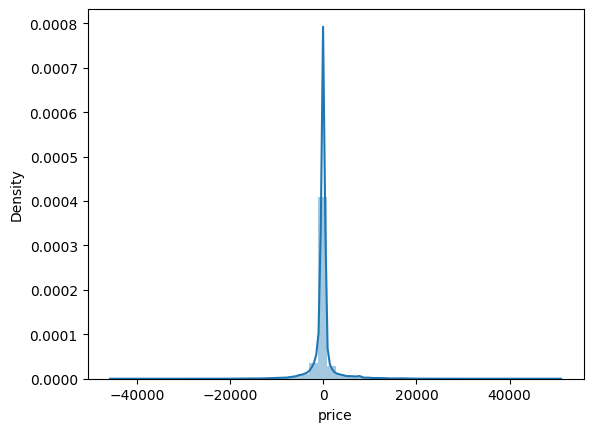

In [81]:
0.798383043987616
sns.distplot(a_test-y_pred)
plt.show()

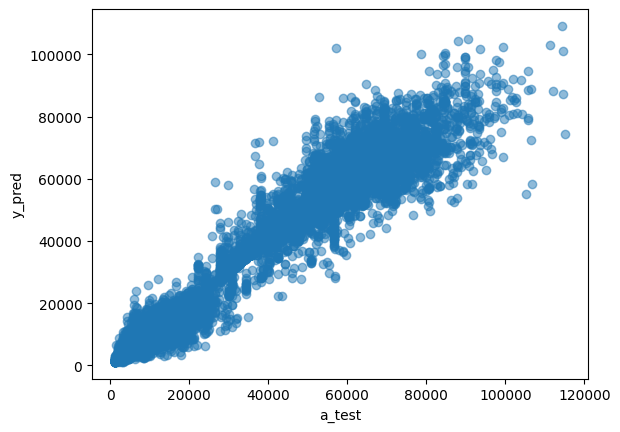

In [82]:
plt.scatter(a_test, y_pred, alpha = 0.5)
plt.xlabel("a_test")
plt.ylabel("y_pred")
plt.show()

In [83]:
import math 

In [84]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn import metrics

In [85]:
print('MAE:', metrics.mean_absolute_error(a_test, y_pred))
print('MSE:', metrics.mean_squared_error(a_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(a_test, y_pred)))

MAE: 1077.3688197366546
MSE: 7761010.232313567
RMSE: 2785.858975668648


In [86]:
df2.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [87]:
importances=dict(zip(reg_rf.feature_names_in_,reg_rf.feature_importances_))
sorted_importances=sorted(importances.items(),key=lambda x:x[1],reverse=True)

In [88]:
sorted_importances

[('Economy', 0.4398800160053487),
 ('Business', 0.43987196863267514),
 ('duration', 0.057808986205038916),
 ('days_left', 0.018539302000727148),
 ('Air_India', 0.005175618522115773),
 ('Vistara', 0.0047886992016089045),
 ('Delhi', 0.0034763762720652607),
 ('Mumbai', 0.0019428066633057765),
 ('stops', 0.0019088399722175795),
 ('Kolkata', 0.0017597013603752312),
 ('Hyderabad', 0.0015155411195768142),
 ('Bangalore', 0.0013246315220990803),
 ('Evening', 0.0011039638342252363),
 ('Morning', 0.0008575541426217691),
 ('Afternoon', 0.0008184866889266709),
 ('Chennai', 0.0008084246577210805),
 ('Early_Morning', 0.0007966134596536571),
 ('Night', 0.0007817513802954628),
 ('AirAsia', 0.00043956547733329756),
 ('Indigo', 0.00031772303841109956),
 ('GO_FIRST', 6.264810335896193e-05),
 ('Late_Night', 5.647019223286345e-05),
 ('SpiceJet', 4.485740286603001e-05)]

In [ ]:
reg=RandomForestRegressor(n_jobs=-1)
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth':[100,200,300],
     'min_samples_split':[2,5,10],
     'max_features':['auto','sqrt'],
     'min_samples_leaf': [1, 2, 4]
}
grid_search= GridSearchCV(reg,param_grid,cv=5)
grid_search.fit(X_train, a_train)

best_params = grid_search.best_params_

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Example usage with a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
reg = RandomForestRegressor(n_jobs=-1)

# Instantiate the random search and fit it
random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Assuming you have your features and labels in X and y
# random_search.fit(X, y)
